X_model_train:  (60000, 784)
X_model_test:  (10000, 784)
df_train_even_features:  (29492, 784)
df_train_even_targets:  (29492,)
df_test_even_features:  (4926, 784)
df_test_even_targets:  (4926,)


C:\Users\galarm2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(50.722222222222214, 0.5, 'Actual')

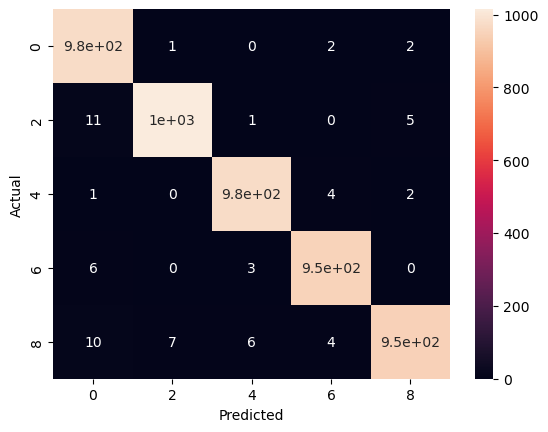

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_model_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[1])
X_model_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[1])
print('X_model_train: ', X_model_train.shape)
print('X_model_test: ', X_model_test.shape)

df_train = pd.DataFrame(X_model_train)
df_test = pd.DataFrame(X_model_test)
df_test.head()
df_train['target']= y_train
df_test['target'] = y_test

df_train_even = df_train[df_train['target'] % 2 == 0]
df_train_even_features = df_train_even.drop(['target'], axis = 1).to_numpy()
df_train_even_targets = df_train_even['target'].to_numpy()
print('df_train_even_features: ', df_train_even_features.shape)
print('df_train_even_targets: ', df_train_even_targets.shape)

df_test_even = df_test[df_test['target'] % 2 == 0]
df_test_even_features = df_test_even.drop(['target'], axis = 1).to_numpy()
df_test_even_targets = df_test_even['target'].to_numpy()
print('df_test_even_features: ', df_test_even_features.shape)
print('df_test_even_targets: ', df_test_even_targets.shape)


X_train = df_train_even_features
X_test = df_test_even_features
y_train = df_train_even_targets
y_test = df_test_even_targets

clf = KNeighborsClassifier(n_neighbors = 3, p = 2, n_jobs = 1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions)
labels = [0,2,4,6,8]

ax = sns.heatmap(cm, annot = True)
ax.set_xticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_yticklabels(labels)
ax.set_ylabel('Actual')
